In [2]:
!pip install openpyxl
!pip install imbalanced-learn
!pip3 install ipympl
!pip install shapely

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import os, sys
from numpy import nan
import re
import ipympl
# from IPython.core.display import display, HTML
import json
from os import listdir
import glob
import math
from IPython.display import Image, display, HTML
from shapely.geometry import mapping
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, mean_absolute_error, make_scorer
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, LeaveOneOut, cross_validate
from sklearn.impute import SimpleImputer
#from tqdm.notebook import tqdm
from sklearn.svm import SVC
#from tqdm import tqdm
import pickle
from imblearn.over_sampling import SMOTE
from scipy.stats import ks_2samp
from scipy import stats
np.seterr(divide='ignore', invalid='ignore')
pd.options.display.max_columns = 100
%matplotlib inline

# Step 1: Data Acquisition

In [4]:
maize_data = pd.read_csv('maize_2018_2019_unl_spectra.csv')

mdf = maize_data

mdf.head(5)

ID       350       351       352       353       354       355       356  \
0   1  0.106430  0.098860  0.088910  0.077947  0.072843  0.093862  0.090015   
1   2  0.097093  0.103140  0.083749  0.066028  0.072148  0.087739  0.098567   
2   3  0.125163  0.124518  0.127662  0.127982  0.127173  0.115487  0.111536   
3   4  0.101250  0.094361  0.086309  0.090478  0.107267  0.088325  0.076786   
4   5  0.096988  0.106913  0.099666  0.085338  0.086283  0.086462  0.085748   

        357       358       359       360       361       362       363  \
0  0.070006  0.090431  0.084056  0.073512  0.073086  0.067475  0.068706   
1  0.092104  0.062686  0.095519  0.107648  0.072792  0.071982  0.077794   
2  0.112970  0.100015  0.079823  0.082658  0.102968  0.088516  0.094781   
3  0.083318  0.080874  0.084091  0.084152  0.079871  0.085310  0.087679   
4  0.084381  0.081730  0.073750  0.071237  0.074610  0.067910  0.071604   

        364       365       366       367       368       369       370  \
0  0.068850  0.063061  0.064384  0.066461  0.070936  0.078129  0.069275   
1  0.071373  0.050405  0.051561  0.051083  0.053461  0.064439  0.047219   
2  0.094515  0.070130  0.074827  0.079704  0.075530  0.064953  0.070498   
3  0.079508  0.062870  0.059119  0.068288  0.075749  0.069223  0.066564   
4  0.070636  0.056747  0.058965  0.066335  0.069005  0.063023  0.066893   

        371       372       373       374       375       376       377  \
0  0.064903  0.067154  0.065122  0.060868  0.058503  0.059176  0.060199   
1  0.043872  0.056082  0.057424  0.058312  0.060843  0.060995  0.048972   
2  0.072435  0.068536  0.068483  0.070248  0.065726  0.058498  0.066385   
3  0.066067  0.066501  0.067355  0.066727  0.062973  0.059307  0.064315   
4  0.068612  0.064870  0.059740  0.061785  0.060540  0.054180  0.053703   

        378       379       380       381       382       383       384  \
0  0.059542  0.056787  0.053711  0.056561  0.059718  0.059836  0.056556   
1  0.051361  0.049914  0.036760  0.052602  0.054866  0.049009  0.052006   
2  0.070785  0.069656  0.066325  0.068654  0.066584  0.063986  0.066945   
3  0.064843  0.063219  0.062928  0.062292  0.062633  0.062704  0.061520   
4  0.055616  0.058491  0.060636  0.058437  0.059741  0.059445  0.052222   

        385       386       387       388       389       390       391  \
0  0.059190  0.057359  0.052478  0.053686  0.054506  0.055347  0.055851   
1  0.052774  0.050657  0.049641  0.054484  0.047719  0.044079  0.048591   
2  0.068194  0.069426  0.069469  0.065436  0.058559  0.057705  0.061731   
3  0.063693  0.063807  0.061729  0.061046  0.060998  0.061302  0.061599   
4  0.053134  0.056167  0.057535  0.056435  0.057803  0.058252  0.056967   

        392       393       394       395       396       397       398  ...  \
0  0.053617  0.055252  0.058038  0.058547  0.057006  0.056262  0.055866  ...   
1  0.048487  0.048350  0.048275  0.047974  0.048457  0.048776  0.048339  ...   
2  0.055525  0.059083  0.065252  0.065030  0.058985  0.062260  0.068849  ...   
3  0.061438  0.063316  0.064415  0.062895  0.062514  0.061758  0.062089  ...   
4  0.057813  0.055887  0.054408  0.055950  0.056722  0.056795  0.055932  ...   

       2451      2452      2453      2454      2455      2456      2457  \
0  0.056319  0.055844  0.055375  0.055058  0.054726  0.054421  0.054162   
1  0.047114  0.046864  0.046694  0.046366  0.045964  0.045663  0.045325   
2  0.055637  0.055295  0.055052  0.054888  0.054461  0.054179  0.054169   
3  0.063220  0.062894  0.062567  0.062176  0.061807  0.061366  0.060850   
4  0.052968  0.052582  0.052181  0.051812  0.051542  0.051262  0.050935   

       2458      2459      2460      2461      2462      2463      2464  \
0  0.053836  0.053488  0.053203  0.052905  0.052548  0.052264  0.051997   
1  0.045112  0.044898  0.044548  0.044306  0.044098  0.043800  0.043470   
2  0.053794  0.053397  0.053165  0.052658  0.052337  0.052304  0.051942   
3  0.060529  0.060285  0.059850  0.059491

In [5]:
mdr = pd.read_csv('maize_2018_2019_unl_traits.csv')

mdr.head(2)

ID  Nitrogen  Phosphorus  Potassium  Chlorophyll  Leaf_Dry_Weight  \
0   1      2.96        0.22       1.78       476.60             8.46   
1   2      3.11        0.48       2.74       492.17             6.69   

   Leaf_Fresh_Weight  Leaf_Area  
0              30.70    1420.57  
1              27.55    1144.10

In [6]:
mdrN = mdr[["Nitrogen"]]
mdrP = mdr[["Phosphorus"]]
mdrK = mdr[["Potassium"]]

In [7]:
mdr.head(2)

ID  Nitrogen  Phosphorus  Potassium  Chlorophyll  Leaf_Dry_Weight  \
0   1      2.96        0.22       1.78       476.60             8.46   
1   2      3.11        0.48       2.74       492.17             6.69   

   Leaf_Fresh_Weight  Leaf_Area  
0              30.70    1420.57  
1              27.55    1144.10

# Step 2: Data Preprocessing 

In [8]:
mdf.isnull().sum()
mdr.isnull().sum()

ID                   0
Nitrogen             0
Phosphorus           0
Potassium            0
Chlorophyll          0
Leaf_Dry_Weight      0
Leaf_Fresh_Weight    0
Leaf_Area            0
dtype: int64

In [9]:
X = mdf

# getting yN, yP, and yK in series form for the input of train-test split ahead   
yN = mdrN
yN = yN.iloc[: , 0]

yP = mdrP
yP = yP.iloc[: , 0]

yK = mdrK
yK = yK.iloc[: , 0]


# Step 3:  Train-Test Split  and its Goodness

In [10]:
rand_st = 14
tst_siz = 0.2

# Train test split for Nitrogen
XN_train, XN_test,yN_train, yN_test = train_test_split(X, yN, test_size = tst_siz, random_state = rand_st)
ks2_test = ks_2samp(yN_train, yN_test) 
print(ks2_test)

KstestResult(statistic=0.08367768595041322, pvalue=0.12848395652787437, statistic_location=2.95, statistic_sign=-1)


C:\Users\abhis\AppData\Local\Temp\ipykernel_20252\1843552486.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


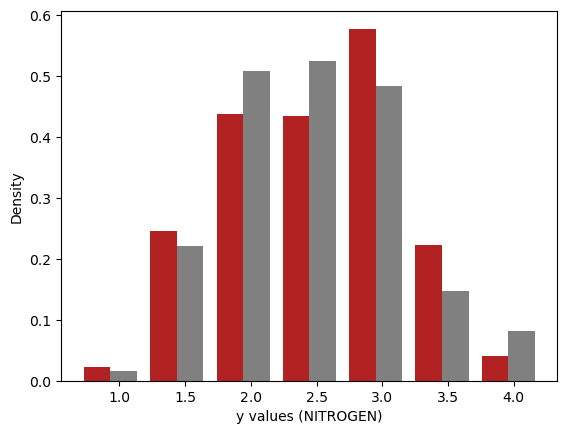

In [11]:
#  Plotting the Distribution of Train and Test Output Data  -----------for  Nitrogen ----
plt.style.use('seaborn-deep')
min_y = np.min(yN)
max_y = np.max(yN)
bins = np.linspace(min_y, max_y, 8)
plt.hist([yN_train, yN_test], bins , label=['Train', 'Test'], density=True, color = ['firebrick','gray'])
plt.xlabel('y values (NITROGEN)')
plt.ylabel('Density')
plt.show()

In [12]:
rand_st = 14
tst_siz = 0.2

# # Train test split for Phosphorous
XP_train, XP_test, yP_train, yP_test = train_test_split(X, yP, test_size = tst_siz, random_state = rand_st)
ks2_test = ks_2samp(yP_train, yP_test) 
print(ks2_test)

KstestResult(statistic=0.08677685950413223, pvalue=0.10456713994278695, statistic_location=0.29, statistic_sign=-1)


C:\Users\abhis\AppData\Local\Temp\ipykernel_20252\857364618.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


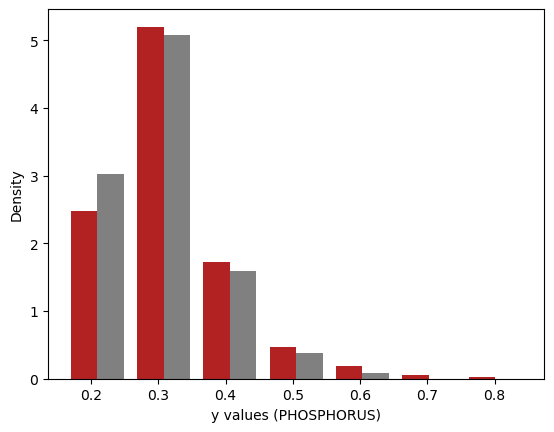

In [13]:
# Plotting the Goodness of Train-Test Split  -----------for  Phosphorus ----
plt.style.use('seaborn-deep')
min_y = np.min(yP)
max_y = np.max(yP)
bins = np.linspace(min_y, max_y, 8)
plt.hist([yP_train, yP_test], bins , label=['Train', 'Test'], density=True, color = ['firebrick','gray'])
plt.xlabel('y values (PHOSPHORUS)')
plt.ylabel('Density')
plt.show()



In [27]:
rand_st = 23
tst_siz = 0.2

#  Train test split for Potasium
XK_train, XK_test, yK_train, yK_test = train_test_split(X, yK, test_size = tst_siz, random_state = rand_st)
ks2_test = ks_2samp(yK_train, yK_test) 
print(ks2_test)

KstestResult(statistic=0.11776859504132231, pvalue=0.008812186388581732, statistic_location=2.26, statistic_sign=-1)


C:\Users\abhis\AppData\Local\Temp\ipykernel_8464\4101453007.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


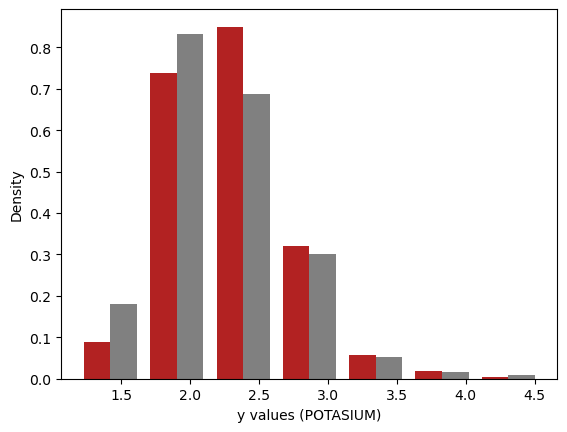

In [28]:
# Plotting the Goodness of Train-Test Split   -----------for  Potasium ----
plt.style.use('seaborn-deep')
min_y = np.min(yK)
max_y = np.max(yK)

#fig, ax = plt.subplots(1,2, figsize=(10,4))
bins = np.linspace(min_y, max_y, 8)

plt.hist([yK_train, yK_test], bins , label=['Train', 'Test'], density=True, color = ['firebrick','gray'])
# results in error when yN_train/ yN_test is data frame or ndarray
#ax[0].legend(loc='upper right')
plt.xlabel('y values (POTASIUM)')
plt.ylabel('Density')
plt.show()

# Step 4: Training the Model

        - Create a regr object
        - Apply fit function (using regr object) on training data
        - Check the weights/parameters generated by fit function 

In [36]:
rf_reg = RandomForestRegressor(n_jobs=-1, random_state=10)

#to generate various random forests.
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 30)]
max_depth = [int(x) for x in np.linspace(3, 4, num = 2)]
max_features = ['log2', 'sqrt']
min_samples_split = [3, 5, 8]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features':max_features,\
              'min_samples_split':min_samples_split, 'bootstrap': [True, False]}

print(random_grid)

rf_modelN = RandomizedSearchCV(estimator=rf_reg, param_distributions = random_grid, cv = 10,\
                                verbose=2, random_state = 10, n_jobs = -1)

rf_modelN.fit(XN_train, yN_train)

{'n_estimators': [10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 72, 75, 78, 81, 84, 87, 90, 93, 96, 100], 'max_depth': [3, 4], 'max_features': ['log2', 'sqrt'], 'min_samples_split': [3, 5, 8], 'bootstrap': [True, False]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=10),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_split': [3, 5, 8],
                                        'n_estimators': [10, 13, 16, 19, 22, 25,
                                                         28, 31, 34, 37, 41, 44,
                                                         47, 50, 53, 56, 59, 62,
                                                         65, 68, 72, 75, 78, 81,
                                                         84, 87, 90, 93, 96,
                                                         100]},
                   random_state=10, verbose=2)

In [37]:
# ##  Create random forest regressor object for phosphorus

rf_reg = RandomForestRegressor(n_jobs=-1, random_state=10)

#to generate various random forests.
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 30)]
max_depth = [int(x) for x in np.linspace(3, 4, num = 2)]
max_features = ['log2', 'sqrt']
min_samples_split = [3, 5, 8]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features':max_features,\
              'min_samples_split':min_samples_split, 'bootstrap': [True, False]}

print(random_grid)

rf_modelP = RandomizedSearchCV(estimator=rf_reg, param_distributions = random_grid, cv = 10,\
                                verbose=2, random_state = 10, n_jobs = -1)

rf_modelP.fit(XP_train, yP_train)

{'n_estimators': [10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 72, 75, 78, 81, 84, 87, 90, 93, 96, 100], 'max_depth': [3, 4], 'max_features': ['log2', 'sqrt'], 'min_samples_split': [3, 5, 8], 'bootstrap': [True, False]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=10),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_split': [3, 5, 8],
                                        'n_estimators': [10, 13, 16, 19, 22, 25,
                                                         28, 31, 34, 37, 41, 44,
                                                         47, 50, 53, 56, 59, 62,
                                                         65, 68, 72, 75, 78, 81,
                                                         84, 87, 90, 93, 96,
                                                         100]},
                   random_state=10, verbose=2)

In [38]:
# ## Create random forest regressor object for Potassium


rf_reg = RandomForestRegressor(n_jobs=-1, random_state=10)

#to generate various random forests.
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 30)]
max_depth = [int(x) for x in np.linspace(3, 4, num = 2)]
max_features = ['log2', 'sqrt']
min_samples_split = [3, 5, 8]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features':max_features,\
              'min_samples_split':min_samples_split, 'bootstrap': [True, False]}

print(random_grid)

rf_modelK = RandomizedSearchCV(estimator=rf_reg, param_distributions = random_grid, cv = 10,\
                                verbose=2, random_state = 10, n_jobs = -1)

rf_modelK.fit(XK_train, yK_train)

{'n_estimators': [10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 72, 75, 78, 81, 84, 87, 90, 93, 96, 100], 'max_depth': [3, 4], 'max_features': ['log2', 'sqrt'], 'min_samples_split': [3, 5, 8], 'bootstrap': [True, False]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=10),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_split': [3, 5, 8],
                                        'n_estimators': [10, 13, 16, 19, 22, 25,
                                                         28, 31, 34, 37, 41, 44,
                                                         47, 50, 53, 56, 59, 62,
                                                         65, 68, 72, 75, 78, 81,
                                                         84, 87, 90, 93, 96,
                                                         100]},
                   random_state=10, verbose=2)

# Step 5: Prediction on Test Data 

In [42]:
print(rf_modelN.best_estimator_)
yN_pred = rf_modelN.predict(XN_test)
yN_pred = np.round(yN_pred, 2)

RandomForestRegressor(bootstrap=False, max_depth=4, max_features='sqrt',
                      min_samples_split=5, n_estimators=81, n_jobs=-1,
                      random_state=10)


In [43]:
print(rf_modelP.best_estimator_)
yP_pred = rf_modelP.predict(XP_test)
yP_pred = np.round(yP_pred, 2)

RandomForestRegressor(bootstrap=False, max_depth=4, max_features='log2',
                      min_samples_split=5, n_estimators=41, n_jobs=-1,
                      random_state=10)


In [41]:
print(rf_modelK.best_estimator_)
yK_pred = rf_modelK.predict(XK_test)
yK_pred = np.round(yK_pred, 2)

RandomForestRegressor(max_depth=4, max_features='log2', min_samples_split=5,
                      n_estimators=50, n_jobs=-1, random_state=10)


# Step 6: Model Accuracy and Plots

In [44]:
#  Mean percentage error for nitrogen
errorsN = np.mean(abs((yN_pred - yN_test)/yN_test))

#  Calculate the rmse for training data Nitrogen
yhatN_pred = rf_modelN.predict(XN_train)
mseNTrain = mean_squared_error(yN_train, yhatN_pred)
rmseNTrain = np.sqrt(mseNTrain)

#  Calculate the rmse for testing data Nitrogen
mseNTest = mean_squared_error(yN_test, yN_pred)
rmseNTest = np.sqrt(mseNTest)

# Calculate the absolute errors for training data Nitrogen
errorsNTrain = abs(yN_train - yhatN_pred)

# Print out the mean absolute error (mae) for training data Nitrogen

# Calculate the absolute errors for testing data Nitrogen
errorsNTest = abs(yN_pred - yN_test)

# Print out the mean absolute error (mae) for testing data Nitrogen

print('Nitogen Model Accuracy')    
print('Nitrogen Root Mean Square Error (Training): %.3f' % rmseNTrain)
print('Nitrogen Root Mean Square Error (Testing): %.3f' % rmseNTest)
print('Nitrogen Mean Absolute Error (For Training):', round(np.mean(errorsNTrain), 3))
print('Nitrogen Mean Absolute Error (For Testing):', round(np.mean(errorsNTest), 3))
print ("Test Nitrogen R2 Score", np.round(r2_score(yN_test, yN_pred), 3))
print('Mean Percentage Error:', errorsN*100)   

Nitogen Model Accuracy
Nitrogen Root Mean Square Error (Training): 0.327
Nitrogen Root Mean Square Error (Testing): 0.384
Nitrogen Mean Absolute Error (For Training): 0.258
Nitrogen Mean Absolute Error (For Testing): 0.305
Test Nitrogen R2 Score 0.627
Mean Percentage Error: 13.298946760555843


In [45]:
#  Mean percentage error for phosphorus
errorsP = np.mean(abs((yP_pred - yP_test)/yP_test))

#  Calculate the rmse for training data phosphorus
yhatP_pred = rf_modelP.predict(XP_train)
msePTrain = mean_squared_error(yP_train, yhatP_pred)
rmsePTrain = np.sqrt(msePTrain)

#  Calculate the rmse for testing data phosphorus
msePTest = mean_squared_error(yP_test, yP_pred)
rmsePTest = np.sqrt(msePTest)

# Calculate the absolute errors for training data phosphorus
errorsPTrain = abs(yP_train - yhatP_pred)

# Print out the mean absolute error (mae) for training data phosphorus

# Calculate the absolute errors for testing data phosphorus
errorsPTest = abs(yP_pred - yP_test)

# Print out the mean absolute error (mae) for testing data phosphorus

print('phosphorus Model Accuracy')    
print('phosphorus Root Mean Square Error (Training): %.3f' % rmsePTrain)
print('phosphorusRoot Mean Square Error (Testing): %.3f' % rmsePTest)
print('phosphorus Mean Absolute Error (For Training):', round(np.mean(errorsPTrain), 3))
print('phosphorus Mean Absolute Error (For Testing):', round(np.mean(errorsPTest), 3))
print ("Test phosphorus R2 Score", np.round(r2_score(yP_test, yP_pred), 3))
print('Mean Percentage Error:', errorsP*100)   

phosphorus Model Accuracy
phosphorus Root Mean Square Error (Training): 0.072
phosphorusRoot Mean Square Error (Testing): 0.067
phosphorus Mean Absolute Error (For Training): 0.054
phosphorus Mean Absolute Error (For Testing): 0.052
Test phosphorus R2 Score 0.144
Mean Percentage Error: 18.223714428868966


In [46]:
#  Mean percentage error for potassium
errorsK = np.mean(abs((yK_pred - yK_test)/yK_test))

#  Calculate the rmse for training data potassium
yhatK_pred = rf_modelK.predict(XK_train)
mseKTrain = mean_squared_error(yK_train, yhatK_pred)
rmseKTrain = np.sqrt(mseKTrain)

#  Calculate the rmse for testing data potassium
mseKTest = mean_squared_error(yK_test, yK_pred)
rmseKTest = np.sqrt(mseKTest)

# Calculate the absolute errors for training data potassium
errorsKTrain = abs(yK_train - yhatK_pred)

# Print out the mean absolute error (mae) for training data potassium

# Calculate the absolute errors for testing data potassium
errorsKTest = abs(yK_pred - yK_test)

# Print out the mean absolute error (mae) for testing data potassium

print('potassium Model Accuracy')    
print('potassium Root Mean Square Error (Training): %.3f' % rmseKTrain)
print('potassium Root Mean Square Error (Testing): %.3f' % rmseKTest)
print('potassium Mean Absolute Error (For Training):', round(np.mean(errorsKTrain), 3))
print('potassium Mean Absolute Error (For Testing):', round(np.mean(errorsKTest), 3))
print ("Test potassium R2 Score", np.round(r2_score(yK_test, yK_pred), 3))
print('Mean Percentage Error:', errorsK*100)   

potassium Model Accuracy
potassium Root Mean Square Error (Training): 0.347
potassium Root Mean Square Error (Testing): 0.418
potassium Mean Absolute Error (For Training): 0.269
potassium Mean Absolute Error (For Testing): 0.319
Test potassium R2 Score 0.132
Mean Percentage Error: 14.898577690658787
